In [ ]:
from pathlib import Path

import networkx as nx

In [96]:
lines = Path("example_1.txt").read_text().strip().splitlines()
print("\n".join(lines))

aaa: you hhh
you: bbb ccc
bbb: ddd eee
ccc: ddd eee fff
ddd: ggg
eee: out
fff: out
ggg: out
hhh: ccc fff iii
iii: out


## Part I

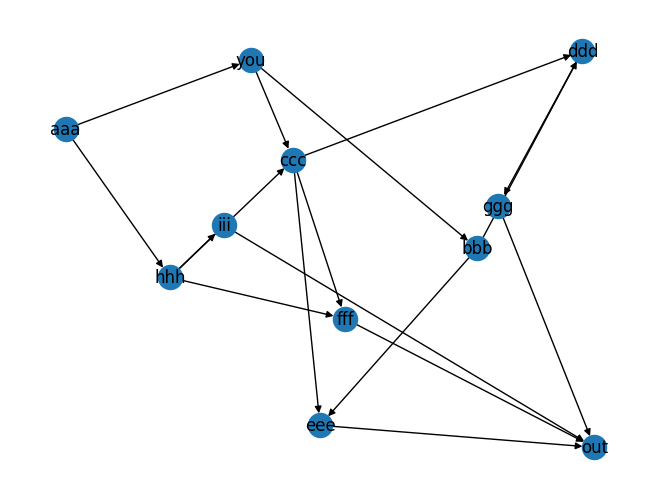

In [97]:
G = nx.DiGraph()

for line in lines:
    input_device, output_devices = line.split(":")
    output_devices = output_devices.split()
    for output_device in output_devices:
        G.add_edge(input_device, output_device)

nx.draw(G, with_labels=True)

In [98]:
paths = list(nx.all_simple_paths(G, source="you", target="out"))
print("\n".join(map(str, paths)))
print("Paths: ", len(paths))

['you', 'bbb', 'ddd', 'ggg', 'out']
['you', 'bbb', 'eee', 'out']
['you', 'ccc', 'ddd', 'ggg', 'out']
['you', 'ccc', 'eee', 'out']
['you', 'ccc', 'fff', 'out']
Paths:  5


## Part II

In [100]:
from functools import cache

import numpy as np


In [101]:
lines = Path("example_2.txt").read_text().strip().splitlines()
device = {"out": []}
for line in lines:
    input_device, output_devices = line.split(":")
    device[input_device] = output_devices.split()


@cache
def count_num_paths(start: str, end: str) -> int:
    total = 0
    for output in device[start]:
        if output == end:
            total += 1
        else:
            total += count_num_paths(output, end)
    return total


path_1 = [("svr", "dac"), ("dac", "fft"), ("fft", "out")]
path_2 = [("svr", "fft"), ("fft", "dac"), ("dac", "out")]

num_paths_1 = [count_num_paths(start, end) for start, end in path_1]
num_paths_2 = [count_num_paths(start, end) for start, end in path_2]

total_paths_1 = np.prod(num_paths_1)
total_paths_2 = np.prod(num_paths_2)

total_paths = total_paths_1 + total_paths_2
print("Total paths:", total_paths)

Total paths: 2
